**Load necessary library**

In [ ]:
import tensorflow as tf
from __future__ import absolute_import, division, print_function, unicode_literals

In [2]:
import numpy as np
import logging
logger = tf.get_logger()
logger.setLevel(logging.ERROR)

Intinya, kita punya **data** yang ada mapping **kolom A** dan **kolom B**. Kita tahu bahwa ada **relationship** dikolom-kolom tersebut tapi kita tidak tau formulasinya. Nah, disinilah yang dimaksud dengan **training** data. Kita __suruh__ "komputer" untuk menebak relasi atau formula tersebut.

Contoh dibawah ini ada data konversi suhu dari **Celcius** ke **Fahrenheit**. Ya memang sih ada rumusnya **F = C x 1.8 + 32**, lha yang coba ditebak oleh komputer ya rumusnya itu.

Agak kontradiktif, ada yang lebih mudah tinggal pake rumus saja kok malah harus bikin machine learning segala. Ya ini namanya belajar fundamental dulu karena ini yang mendasari semua jenis machine learning yang akan kita pelajari. Jadi sabar ya.

Datanya seperti ini nih;

    -40 C = -40 F
    -10 C = 14 F
      0 C = 32 F
      8 C = 46 F
     15 C = 59 F
        dst
Bisa dilihat ya konversinya seperti itu, jadi **C** sebagai __input__ dan **F** sebagai __output__. Kalo kita belum tau rumusnya kan bingung itu ngitungnya gimana kok gitu, ya kan?

In [3]:
celcius_i = np.array([-40, -10, 0, 8, 15, 22, 38])
fahrenheit_o = np.array([-40, 14, 32, 46, 59, 72, 100])

for i,c in enumerate(celcius_i):
    print("{} C = {} F".format(c, fahrenheit_o[i]))

-40 degress C = -40 degress F
-10 degress C = 14 degress F
0 degress C = 32 degress F
8 degress C = 46 degress F
15 degress C = 59 degress F
22 degress C = 72 degress F
38 degress C = 100 degress F


Ok, sampai disini kita paham ya soal **data**
Selanjutnya kita ngomongin tentang **model** yang kita _suruh_ menebak rumus relasi data diatas.

**Model** itu gambaran matematika dimana ada **input**, **process** dan **output**. Dalam konteks machine learning, komponen-komponen itu disebut **Layer**

<table>
  <tr><td>
    <img src="https://raw.githubusercontent.com/abhiemanyu87/ml-excercise/master/img/dense_layer.PNG"
         alt="Dense Layer" width="600">
  </td></tr>
  <tr><td align="center">
    <b>Figure 1. Dense Layer</b>
  </td></tr>
</table>

Disebut **Hidden Layer** karena kita gak perlu tau proses apa yang ada dalam layer tersebut. Tapi pada dasarnya proses itu adalah proses penyesuaian nilai internal variable dalam layer tersebut agar output sesuai dengan data training.

**Dense** layer adalah _fully-connected_ layer dimana node atau **neuron** saling terhubung antara layer awal dan layer selanjutnya.

Gambar tersebut hanya ilustrasi susunan layer dalam model. Tidak harus kok model memiliki jumlah 3 atau lebih. Bahkan model yang kita gunakan dalam latihan ini cuma satu.


**Model creation**

Kita bikin layer dulu pake `tf.keras.layers.Dense` dengan parameter `units=1` karena kita butuh 1 neuron. Kemudian `input_shape=[1]` karena layer ini terhubung dari input dengan satu input parameter.

Oh iya, karena kita pake `Dense layer` jadi otomatis neuron terhubung dengan input dan output ya 

In [24]:
layer0 = tf.keras.layers.Dense(units=1, input_shape=[1])

Setelah bikin layer, kita rangkai layer tersebut menjadi model dengan `tf.keras.Sequential`.

In [25]:
model = tf.keras.Sequential([
        layer0
])

In [26]:
model.compile(loss='mean_squared_error', optimizer=tf.keras.optimizers.Adam(0.1))

In [27]:
history = model.fit(celcius_i, fahrenheit_o, epochs=500, verbose=False)
print("Finished training.")

Finished training.


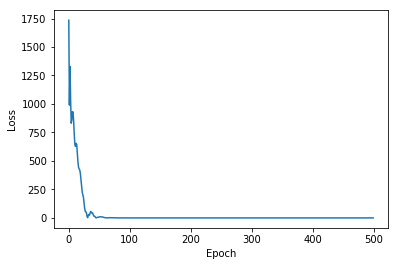

In [28]:
import matplotlib.pyplot as plot
plot.xlabel("Epoch")
plot.ylabel("Loss")
plot.plot(history.history['loss'])
plot.show()

In [29]:
value = model.predict([100.0])
print("100.0 C is {} F".format(value))

100.0 C is [[211.7474]] F


In [30]:
value = model.predict([98])
print("98 C = {} F".format(value))

98 C = [[208.15152]] F


In [31]:
weights = layer1.get_weights()
print("weights {}".format(weights))

weights [array([[ 0.23469843,  0.79884714, -0.6798262 , -0.7416295 ],
       [-0.7497317 , -0.00573947, -0.37555486, -0.2632617 ],
       [ 0.59369755, -0.46305197,  0.02435504, -0.3388907 ],
       [ 0.07763465,  0.12920234,  0.6454109 ,  1.1977391 ]],
      dtype=float32), array([ 2.8613427, -2.8679228,  3.174113 ,  3.1838791], dtype=float32)]
